## Définition du Problème
Le taux de démission des employés dans une entreprise est un problème très couteux pour ces dernières. L'étude d'une entreprise américainne(Center for American Progress) révéle que les entreprises paient généralement environ 1/5 du salaire d'un employé le remplacer.<br>
Comprendre pourquoi et quand les employés sont susceptibles de partir(démissioner) permet d'engager des actions visant à les rétenir ou dans le meilleur des cas planifier une nouvelle embauche à l'avance.<br><br>
Le projet consiste donc à dectecter l'attrtion d'un employé.<br><br>
Pour cette étude, nous avons obtenu les données à partir d'IBM HR Analytics Employee Attrition & Performance qui contient des données sur les employés.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Acquisition des données

In [20]:
df_employees = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [21]:
df_employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
print("Format des données:{0}".format(df_employees.shape))

Format des données:(1470, 35)


In [23]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Nous n'obervons aucune valeur manquante. Ce qui est plutôt une bonne nouvelle. 

In [24]:
df_employees.dtypes.value_counts()

int64     26
object     9
dtype: int64

Nous Pouvons aussi constater que nous avons beaucoup de variables catégorielles. Nous allons mettre un accent sur l'ensemble de ces variables dans la suite de l'analyse. Jettons un aperçu rapide sur les variables numériques  

In [25]:
df_employees.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


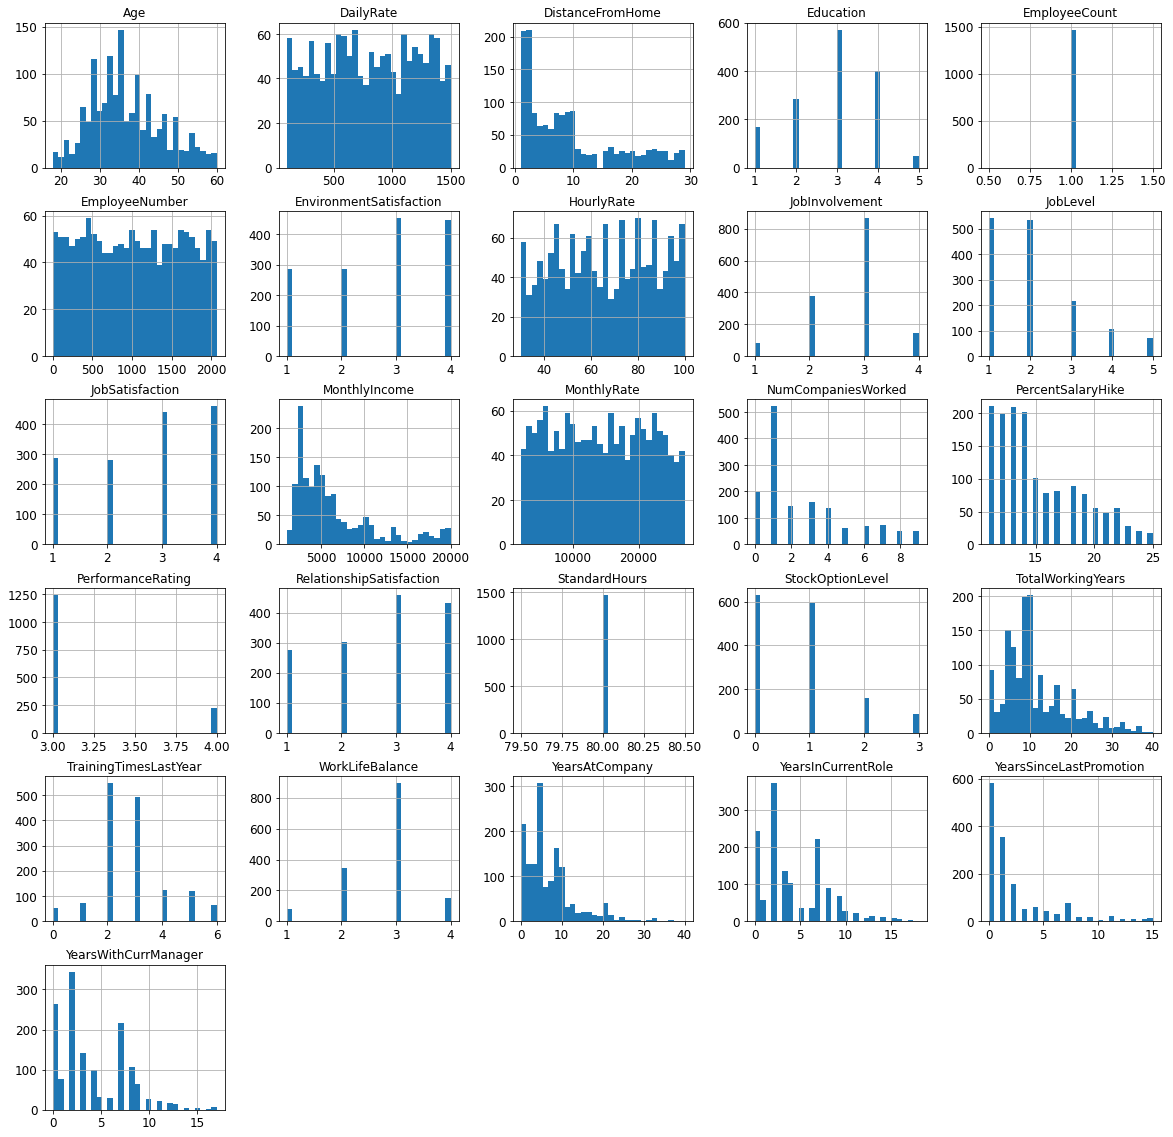

In [26]:
df_employees.hist(bins=30, figsize=(20, 20))
plt.show()

Quelques remarques peuvent être faites à partir de cet histogramme
<ul>
    <li>Les variables <b>EmployeeCount</b> et <b>EmployeeCount</b> ont des valeurs uniques.</li>
    <li>Plusieus variables sont dussymétriques à droite (<b>DistanceFromHome</b>, <b>MontlyIcome</b>,<b>NumcompaniesWorked</b>,         <b>TotalWorkingYears</b>, <b>YearsAtCompany</b>, <b>YearsSinceLastPromotion</b>, ...), certains algorithmes ont du mal         à détecter les structurations dans de telles données
        pour ne citer que ceux là
    </li>
</ul>

### Création du jeu de test

In [27]:
#Créons notre jeu de test
train_employees, test_employees = train_test_split(df_employees, test_size=0.2, random_state=42)

In [28]:
len(train_employees)

1176

In [29]:
len(test_employees)

294

## Visualisation des données afin de mieux les comprendre

In [30]:
employees = train_employees.copy()

<AxesSubplot:>

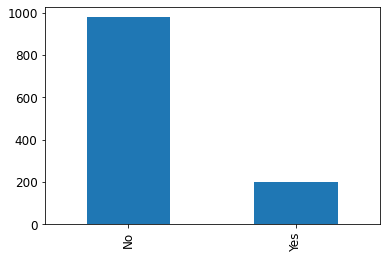

In [31]:
#Visualation de la colonne cible
employees['Attrition'].value_counts().plot(kind='bar')

Il existe plus d'employés restés dans l'entreprise que ceux partis, nous avons à faire à une classification déséquilibrée. Nous prendrons des decisions necessaires.

In [32]:
var_cat = [col for col in employees.select_dtypes(include=['object']).columns if col not in 'Attrition']
var_num = employees.select_dtypes(exclude=['object']).columns
var_num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

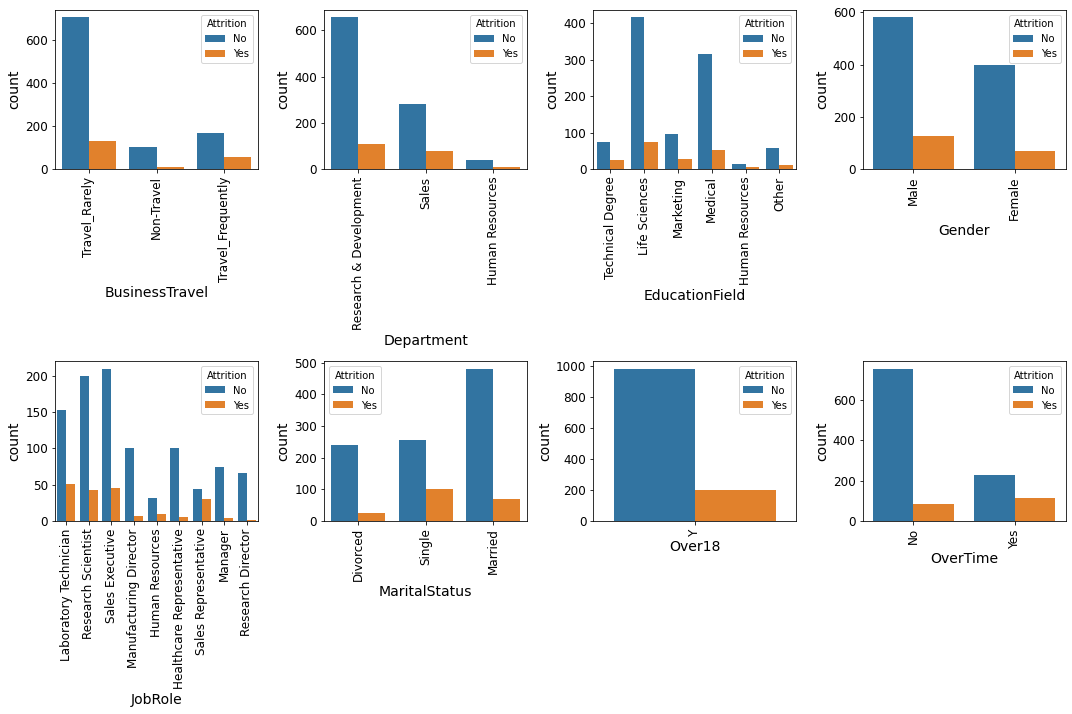

In [33]:
fig = plt.figure(figsize=(15,10))
rowCnt = 2
colCnt = 4
subCnt = 1

for var in var_cat:
    
    plt.subplot(rowCnt, colCnt, subCnt)
    #plt.xlabel(i, fontsize=12)
    g = sns.countplot(x=var, hue='Attrition', data = employees)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    subCnt = subCnt + 1
    
plt.tight_layout()

    

Quelques observations
<ul>
    <li>La proportion des femmes qui démissionent(quittent) l'entreprise est superieur aux hommes.</li>
    <li>Nous obervons beaucoup de démission dns le secteur Madical et Sciences de la vie</li>
    <li>Fait étonnant, le département le affecté par les demissions est celui des R&D quand on sait que c'est qui permet à         l'entreprise d'innover</li>
    <li>Les plus de 18 ans sont nombreux, rien de supprenant, peut être des retraites anticipées.</li>
    <li>Les célébataires sont le plus affecté, pas vraiment étonnant.</li>
</ul>


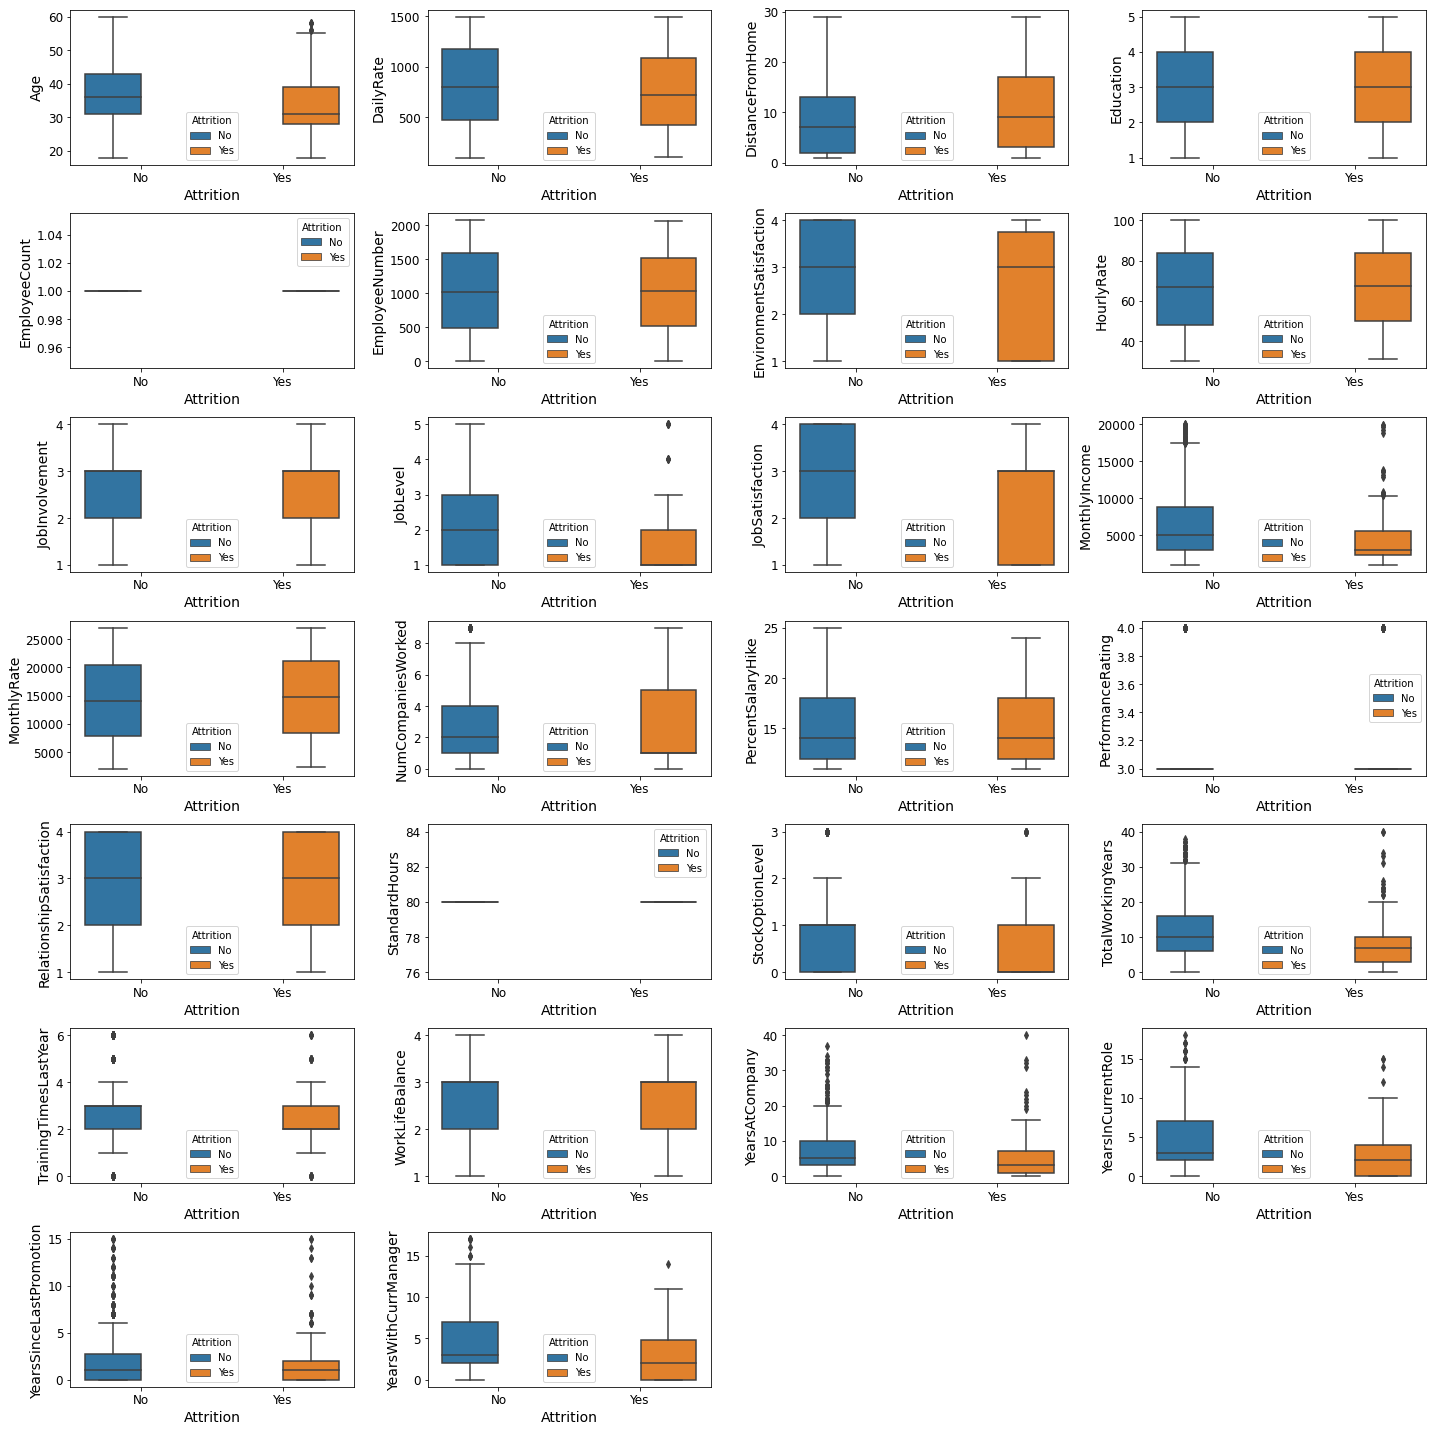

In [34]:
fig = plt.figure(figsize=(20,20))
rowCnt = 7
colCnt = 4
subCnt = 1

for var in var_num:
    
    plt.subplot(rowCnt, colCnt, subCnt)
    #plt.xlabel(i, fontsize=12)
    g = sns.boxplot(x='Attrition', y=var , hue='Attrition', data = employees)
    g.set_xticklabels(g.get_xticklabels(),color='black')
    subCnt = subCnt + 1
    
plt.tight_layout()

Il n'y a assez de disparité entre nos données. Bonne nouvelle Visualisons les correlations entre les données

In [35]:
#Tranformation la variable cible en numérique
employees['Attrition'] = (employees['Attrition']=='Yes').astype(int)
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,0,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,...,2,80,3,2,3,3,1,1,0,0
727,18,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,4,80,0,0,2,3,0,0,0,0
254,29,0,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,...,4,80,1,10,2,3,3,2,0,2
1175,39,0,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,...,3,80,0,7,3,3,5,4,1,0
1341,31,0,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,...,1,80,1,10,2,3,10,8,0,2


In [36]:
corr_matrix = employees.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.067886
NumCompaniesWorked          0.063013
MonthlyRate                 0.019092
HourlyRate                  0.003221
EmployeeNumber              0.000250
PerformanceRating          -0.005086
PercentSalaryHike          -0.017458
RelationshipSatisfaction   -0.018682
Education                  -0.022896
YearsSinceLastPromotion    -0.028593
DailyRate                  -0.039971
TrainingTimesLastYear      -0.060597
WorkLifeBalance            -0.064892
EnvironmentSatisfaction    -0.080855
JobSatisfaction            -0.104915
JobInvolvement             -0.117724
YearsAtCompany             -0.132936
Age                        -0.153240
StockOptionLevel           -0.155555
YearsWithCurrManager       -0.158191
MonthlyIncome              -0.159820
TotalWorkingYears          -0.169475
JobLevel                   -0.172187
YearsInCurrentRole         -0.177569
EmployeeCount                    NaN
StandardHours                    NaN
N

<ul>
    <li>Il existe beaucoup de variables fortement correlées negativement avec la variable cible (<b>PerformanceRating</b>,             <b>PercentSalaryHike</b>, <b>RelationshipSatisfaction</b>, <b>Education</b>, <b>YearsSinceLastPromotion</b>,                     <b>DailyRat</b>, <b>TrainingTimesLastYear</b>, WorkLifeBalance, <b>EnvironmentSatisfaction</b>, <b>JobSatisfaction</b>,         <b>JobInvolvement</b>,<b>YearsAtCompany</b>)
    </li>
    <li>Par contre les variables (<b>DistanceFromHome</b>, <b>NumCompaniesWorked</b>, <b>MonthlyRate</b>, <b>HourlyRate</b>,       <b>EmployeeNumber</b>) ont des corrélations positives
    </li>
<ul>

## Préparation des données

In [37]:
employees = train_employees.drop('Attrition', axis=1)
target = train_employees['Attrition'].copy()

### Nettoyage

In [38]:
employees.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    775
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1176
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1094
MonthlyRate                 1152
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

Les variables StandardHours et EmployeeCount sont redondantes pour tout employé. Supprimons les.
La varible EmployeeNumber est unique pour tout employé. Supprimons la également. 

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

drop_col = ['StandardHours','EmployeeCount','EmployeeNumber']

class Deletecol(BaseEstimator, TransformerMixin):
    def __init__(self, controlAction = True):
        self.controlAction = controlAction
    def fit(self, X):
        return self
    def transform(self, X):
        X = X.drop(drop_col, axis=1)
        if self.controlAction:
            return X

num_pipeline = Pipeline([
     ('del_col', Deletecol(controlAction=True)),
     ('std_scaler', StandardScaler()),
 ])


In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# full Pipeline 
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, var_num),
    ("cat", OneHotEncoder(), var_cat),
])
employees_prepared = full_pipeline.fit_transform(employees)
employees_prepared = pd.DataFrame(employees_prepared, index=employees.index)
employees_prepared.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
1097,-1.388559,-1.108139,1.440396,-0.863356,0.279706,-0.472832,-1.012340,-0.932274,-1.582336,-0.868277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
727,-2.040738,-1.263481,-0.522699,-0.863356,-0.639104,0.309374,0.389912,-0.932274,1.152834,-1.132807,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
254,-0.845077,1.103647,1.317703,-0.863356,1.198515,-1.059487,0.389912,-0.025447,1.152834,0.116537,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1175,0.241886,-0.758001,0.336155,0.099933,1.198515,-0.032841,0.389912,-0.025447,-0.670613,-0.231070,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1341,-0.627685,-1.204303,1.317703,0.099933,-0.639104,1.091580,0.389912,-0.025447,0.241111,-0.464366,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Selection et entrainement des modèles

In [41]:
#Encodons variable cible
le = LabelEncoder()
le.fit(target)
employees_labels = le.transform(target)
employees_labels

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
# Fonction pour afficher les scores
def display_scores(scores):
    print("scores :", scores)
    print("Moyenne: {:.2f}%".format(scores.mean()*100))

def best_model_param(model):
    print("Paramètres :", model.best_params_)
    print("Estimateur :", model.best_estimator_)
    print("scores: {:.2f}%".format(model.best_score_*100)) 

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Apprentissage du modele SVC
svm = SVC(gamma='auto', random_state=42)
svm.fit(employees_prepared, employees_labels)
svm_scores = cross_val_score(svm, employees_prepared, employees_labels, cv=10, scoring="accuracy")
display_scores(svm_scores)

scores : [0.8220339  0.84745763 0.86440678 0.88135593 0.83898305 0.84745763
 0.88034188 0.85470085 0.87179487 0.87179487]
Moyenne: 85.80%


##### Apprentissage du modèle: Forêt aléatoire

In [44]:
# Apprentissage du modele RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(employees_prepared, employees_labels)
forest_clf_scores = cross_val_score(forest_clf, employees_prepared, employees_labels, cv=10, scoring="accuracy")
display_scores(forest_clf_scores)

scores : [0.83898305 0.88983051 0.86440678 0.86440678 0.84745763 0.84745763
 0.88034188 0.81196581 0.87179487 0.87179487]
Moyenne: 85.88%


##### Apprentissage du modèle: Regression Logistique

In [45]:
# Apprentissage du modele LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(employees_prepared, employees_labels)
log_reg_scores = cross_val_score(log_reg, employees_prepared, employees_labels, cv=10, scoring="accuracy")
display_scores(log_reg_scores)

scores : [0.84745763 0.88983051 0.90677966 0.90677966 0.8559322  0.86440678
 0.88034188 0.88888889 0.88888889 0.82051282]
Moyenne: 87.50%


### Recherche des paramètres optimaux pour les deux meilleurs modèles: RandomForestClassifier et LogisticRegression

#### Paramètres - RandomForestClassifier et évaluation


In [46]:
from sklearn.metrics import accuracy_score
params_grid_forest_clf = {   'n_estimators': [10, 20 , 30, 40, 50, 60],
                             'max_features': [2,4,6,8,10]
                          }

forest_clf = RandomForestClassifier(random_state=42)

forest_clf_grid = GridSearchCV(forest_clf, params_grid_forest_clf, cv=5, return_train_score=True, verbose=0)
forest_clf_grid.fit(employees_prepared, employees_labels)
best_model_param(forest_clf_grid)
forest_clf_best = forest_clf_grid.best_estimator_
#y_employees_pred = forest_clf_grid.predict(employees_prepared)
#print("Random Forest: "+str(accuracy_score(y_employees_pred, employees_labels)) )
#(model, employees_prep, employees_label, cv=5)

Paramètres : {'max_features': 10, 'n_estimators': 50}
Estimateur : RandomForestClassifier(max_features=10, n_estimators=50, random_state=42)
scores: 86.31%


On observe une légère amélioration. On aurait pu avoir des meilleures scores en augmentant l'intervalle des paramètres, d'où l'importance des ressources adéquates pour des projets de Machine Learning.<br>
Jettons un coup sur les coeficients de chaque variable.

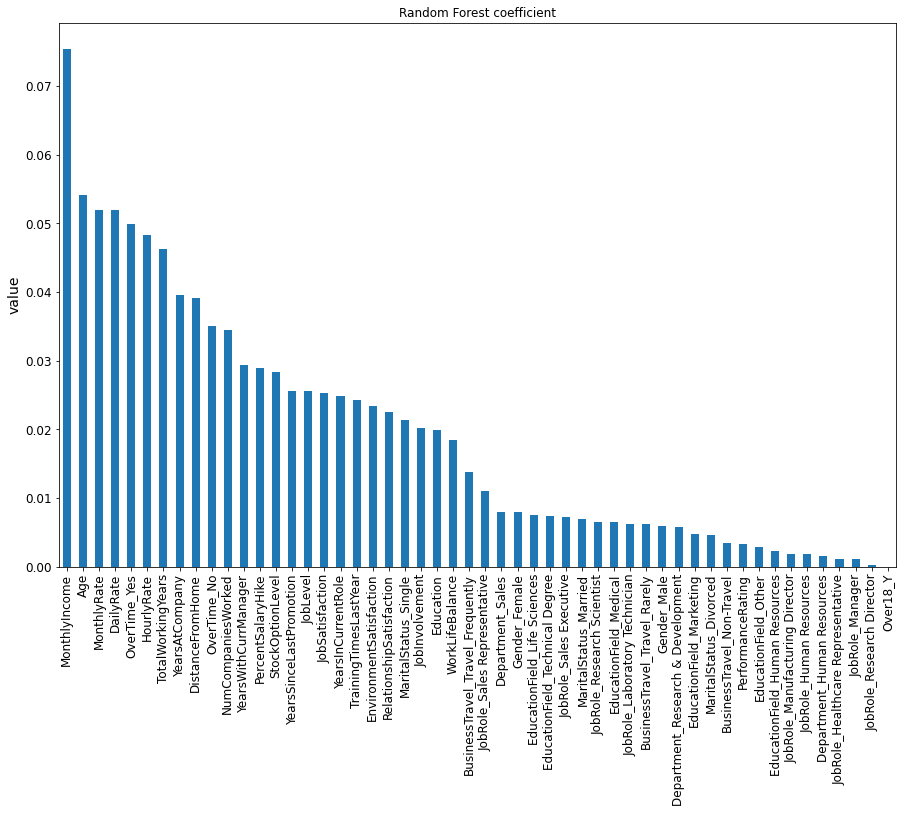

In [47]:
# Recuperons les noms des attributs
encoder=OneHotEncoder(sparse=False)
emp_encoded = pd.DataFrame(encoder.fit_transform(employees[var_cat]))
emp_encoded.columns = encoder.get_feature_names(var_cat)
cat_encoded = [col for col in emp_encoded.columns]

attrib_num = [col for col in var_num if col not in drop_col]

attributes = attrib_num + cat_encoded

feature_importances = pd.Series(forest_clf_grid.best_estimator_.feature_importances_, index=attributes).sort_values(ascending=False)

fig = plt.figure(figsize=(15,10))
feature_importances.plot(kind="bar")
plt.title("Random Forest coefficient")
plt.ylabel("value")
plt.show()


Avec ce diagramme nous pouvons nous rendre compte certaines variables ne sont pas très utiles à notre apprentissage notamment
la variable <b>Over18_Y</b> 

In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

def plot_confusion_matrix(model, employees_prep, employees_label):
    
    y_employees_pred = cross_val_predict(model, employees_prep, employees_label, cv=5)
    conf_matrix = confusion_matrix(employees_label, y_employees_pred)
    df_cm = pd.DataFrame(conf_matrix, index=[0,1])
    fig = plt.figure(figsize=(7,5))

    # create heatmap
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix - RandomForestClassifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def model_metrics(model, employees_prep, employees_label):
    metrics = []
    y_employees_pred = cross_val_predict(model, employees_prep, employees_label, cv=5)
    precision = precision_score(employees_label, y_employees_pred)
    recall = recall_score(employees_label, y_employees_pred)
    scores = model.best_score_*100
    
    return pd.DataFrame(
        {
            "score": scores,
            "precision": precision*100,
            "recall":recall*100
        },
        index=[0])
    

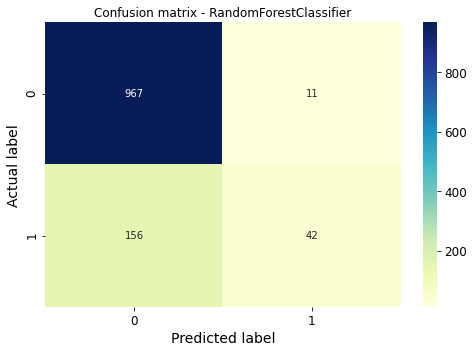

In [49]:
## Plot confusion Matrix
plot_confusion_matrix(forest_clf_grid, employees_prepared, employees_labels)


#### Paramètres - LogisticRegression et évaluation

In [50]:
params_grid_log_reg = {   'C': [0.1,10,20,50],
                           'penalty': ["l1", "l2"]
                      }

log_reg = LogisticRegression(solver='liblinear', random_state=42)

log_reg_grid = GridSearchCV(log_reg, params_grid_log_reg, cv=5, refit=True, verbose=0)
log_reg_grid.fit(employees_prepared, employees_labels)
best_model_param(log_reg_grid)
log_reg_best= log_reg_grid.best_estimator_

Paramètres : {'C': 0.1, 'penalty': 'l2'}
Estimateur : LogisticRegression(C=0.1, random_state=42, solver='liblinear')
scores: 87.59%


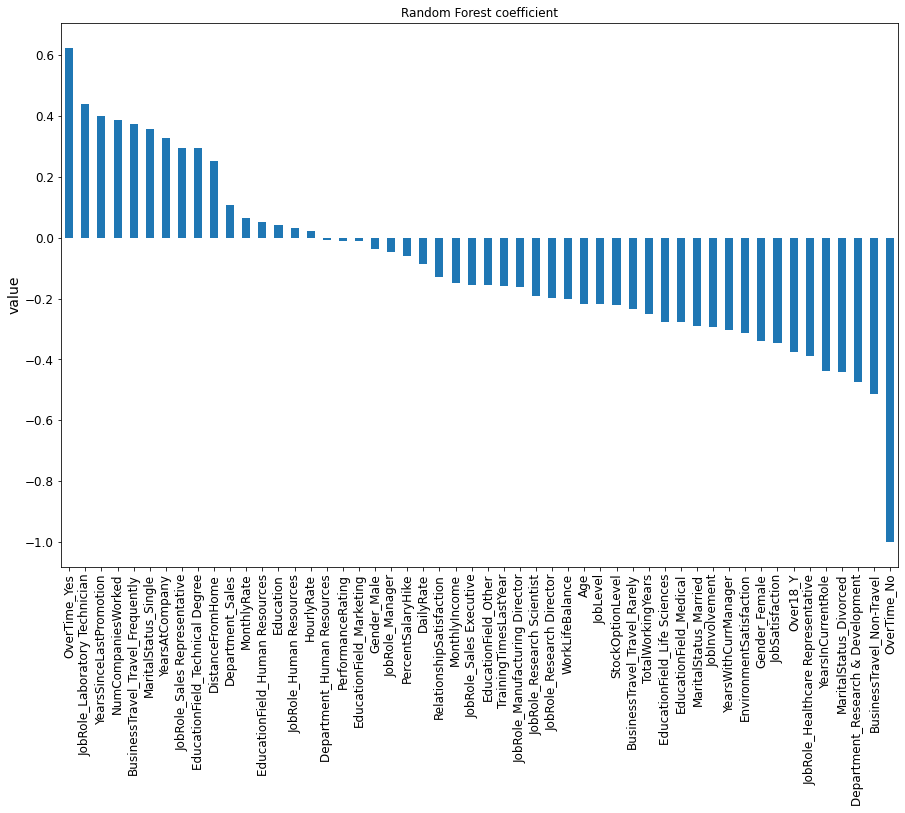

In [51]:
coeffs = pd.Series(log_reg_grid.best_estimator_.coef_.flatten(), index=attributes).sort_values(ascending=False)

fig = plt.figure(figsize=(15,10))
coeffs.plot(kind="bar")
plt.title("Random Forest coefficient")
plt.ylabel("value")
plt.show()

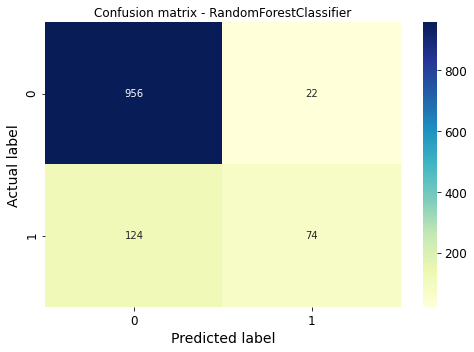

In [52]:
#Plot confusion matrix Logistic Regressio
plot_confusion_matrix(log_reg_best, employees_prepared, employees_labels)

<AxesSubplot:>

<Figure size 576x360 with 0 Axes>

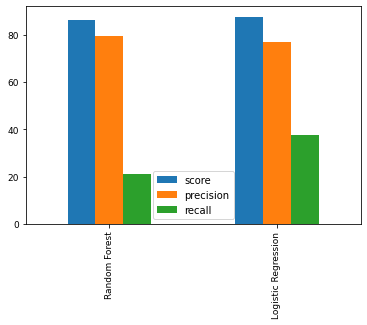

In [121]:
from sklearn.metrics import roc_curve
Random_forest_metrics = model_metrics(forest_clf_grid, employees_prepared, employees_labels)
Log_regression_metrics = model_metrics(log_reg_grid, employees_prepared, employees_labels)


fig = plt.figure(figsize=(8,5))

df = pd.concat([Random_forest_metrics, Log_regression_metrics], axis=0, keys=['Random Forest','Logistic Regression']).reset_index(level=1, drop=True)
df.plot(kind='bar')


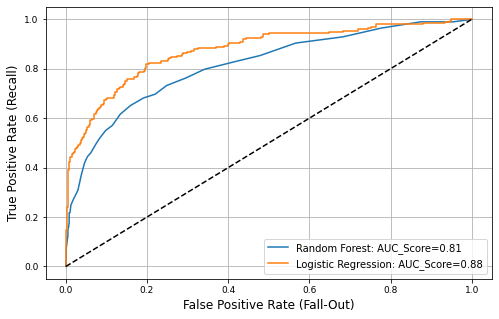

In [130]:
from sklearn.metrics import roc_auc_score
## Courbe 
y_probas_forest = cross_val_predict(forest_clf_best, employees_prepared, employees_labels, cv=5, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] 
fpr, tpr, thresholds=roc_curve(employees_labels, y_scores_forest)
rocAucScores_log = log_reg_best.predict_proba(employees_prepared)[:,1]
log_fpr, log_tpr, log_thresholds=roc_curve(employees_labels, rocAucScores_log)

plt.figure(figsize=(8,5))
# # Plot Random Forest ROC
plt.plot(fpr, tpr, label="Random Forest: AUC_Score={:.2f}".format(roc_auc_score(employees_labels, y_scores_forest)))
# # Plot Logistic Regression ROC
plt.plot(log_fpr, log_tpr, label="Logistic Regression: AUC_Score={:.2F}".format(roc_auc_score(employees_labels, rocAucScores_log)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)
plt.show()

Il va sans dire que notre meilleur modèle est celui de la <b>Regression logistique</b>. Nous allons l'utiliser pour evaluer nos données de test Passons donc à l'évaluation sur les données de test

### Evaluation sur les données de test

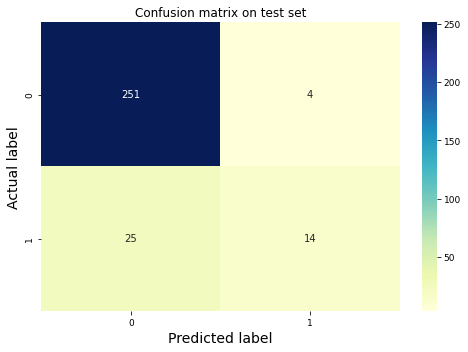

In [131]:
## Evaluation sut les données de test

employees_test = test_employees.drop('Attrition', axis=1)
target_test = test_employees['Attrition'].copy()

#Encodons variable cible
le = LabelEncoder()
le.fit(target_test)
target_test = le.transform(target_test)

employees_test_prepared = full_pipeline.transform(employees_test)
employees_test_pred = log_reg_best.predict(employees_test_prepared)

conf_matrix = confusion_matrix(target_test, employees_test_pred)
df_cm = pd.DataFrame(conf_matrix, index=[0,1])
fig = plt.figure(figsize=(7,5))

# create heatmap
sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test set')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()


### Conclusion

Nous aurons pu obtenir des meilleures résultats si nous disposions d'avantages de données.Néanmoins au terme de notre apprentissage nous pouvons tirer les conclusion suivantes:
<ul>
    <li><b>Monthly Income:</b> les personnes dont les salaires sont plus élevés sont moins susceptibles de quitter                     l'entreprise. Par conséquent, des efforts devraient être faits pour recueillir des informations sur les références de           l'industrie sur le marché local actuel afin de déterminer si l'entreprise offre des salaires compétitifs.
    </li>
    <li><b>OverTme:</b> les personnes qui font des heures supplémentaires sont plus susceptibles de quitter l'entreprise.
    </li>
    <li><b>Age:</b> Les employés de la tranche d'âge relativement jeune de 25 à 35 ans sont plus susceptibles de partir. Ainsi,         des efforts doivent être faits pour articuler clairement la vision à long terme de l'entreprise et les jeunes                   collaborateurs s'inscrivent dans cette vision,  
    </li>
    <li><b>NumCompaniesWorked:</b> les personnes ayant déja travaillé dans plusieurs entreprises sont succeptibles de quitter à            nouveau l'entreprise
    </li>
    <li><b>JobLevel:</b> les Techiniciens labaratins sont également concernés par la démission. Il serait important peut être           de revoir leur condition de travail
    </li>
    <li><b>YearsSinceLastPromotion:</b> Le nombre d'années passé dans un poste est un facteur de frustration de l'employé                pouvant le pousser à aller voir ailleurs
    </li>
<ul>